In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# CSV 파일에서 데이터를 불러오기
df = pd.read_csv('data/질병성분데이터.csv', encoding='utf-8')
df.head(3)

,날짜,2018.01,2018.02,2018.03,2018.04,2018.05,2018.06,2018.07,2018.08,2018.09,...,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.1,2022.11,2022.12
0,미세먼지,50.000,52.000,49.000,56.000,43.000,38.000,28.000,24.000,24.000,...,42.000,39.000,33.000,22.000,22.000,19.000,22.000,26.000,39.000,35.000
1,초미세먼지,32.000,30.000,31.000,25.000,22.000,24.000,17.000,12.000,13.000,...,22.000,19.000,17.000,12.000,13.000,10.000,11.000,14.000,23.000,20.000
2,아황산가스,0.005,0.005,0.004,0.004,0.004,0.004,0.004,0.004,0.003,...,0.003,0.003,0.003,0.002,0.002,0.002,0.002,0.002,0.003,0.003


In [3]:
transposed_df = df.transpose()
transposed_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
날짜,미세먼지,초미세먼지,아황산가스,이산화질소,일산화탄소,폐렴,파킨슨,천식,정신질환,안구건조증,심근경색,뇌졸증,폐질환,호흡기,납
2018.01,50.0,32.0,0.005,0.026,0.6,212913.0,52047.0,290449.0,1225370.0,356970.0,28712.0,207866.0,60421.0,17386.0,0.010232
2018.02,52.0,30.0,0.005,0.025,0.6,140104.0,48243.0,219877.0,1158286.0,330098.0,26236.0,189434.0,51032.0,16029.0,0.010362


In [4]:
df = transposed_df.rename(columns=transposed_df.iloc[0])
df.head(3)

,미세먼지,초미세먼지,아황산가스,이산화질소,일산화탄소,폐렴,파킨슨,천식,정신질환,안구건조증,심근경색,뇌졸증,폐질환,호흡기,납
날짜,미세먼지,초미세먼지,아황산가스,이산화질소,일산화탄소,폐렴,파킨슨,천식,정신질환,안구건조증,심근경색,뇌졸증,폐질환,호흡기,납
2018.01,50.0,32.0,0.005,0.026,0.6,212913.0,52047.0,290449.0,1225370.0,356970.0,28712.0,207866.0,60421.0,17386.0,0.010232
2018.02,52.0,30.0,0.005,0.025,0.6,140104.0,48243.0,219877.0,1158286.0,330098.0,26236.0,189434.0,51032.0,16029.0,0.010362


In [5]:
df = df.drop(df.index[0])

df.head(3)

,미세먼지,초미세먼지,아황산가스,이산화질소,일산화탄소,폐렴,파킨슨,천식,정신질환,안구건조증,심근경색,뇌졸증,폐질환,호흡기,납
2018.01,50.0,32.0,0.005,0.026,0.6,212913.0,52047.0,290449.0,1225370.0,356970.0,28712.0,207866.0,60421.0,17386.0,0.010232
2018.02,52.0,30.0,0.005,0.025,0.6,140104.0,48243.0,219877.0,1158286.0,330098.0,26236.0,189434.0,51032.0,16029.0,0.010362
2018.03,49.0,31.0,0.004,0.023,0.5,155550.0,52283.0,245707.0,1242419.0,377785.0,29573.0,206627.0,56492.0,16711.0,0.008104


In [6]:
# 선택한 컬럼만 추출
selected_columns = ['아황산가스','폐렴','폐질환', '호흡기','천식']
df_selected = df[selected_columns]
df_selected.tail(3)

,아황산가스,폐렴,폐질환,호흡기,천식
2022.1,0.002,152758.0,47319.0,9439.0,178362.0
2022.11,0.003,140485.0,49910.0,9693.0,178725.0
2022.12,0.003,136083.0,50008.0,9698.0,181525.0


In [7]:
# 아황산가스가 높을 때의 데이터와 낮을 때의 데이터로 나누기
high_pm_data = df_selected[df_selected['아황산가스'] > df_selected['아황산가스'].median()]
low_pm_data = df_selected[df_selected['아황산가스'] <= df_selected['아황산가스'].median()]


In [8]:
# 높은 아황산가스 그룹과 낮은 아황산가스 그룹에서의 평균 비교
impact_percentages = ((high_pm_data.mean() - low_pm_data.mean()) / low_pm_data.mean()) * 100


In [9]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [10]:
# 모든 값을 양수로 만들기
impact_percentages = impact_percentages.abs()


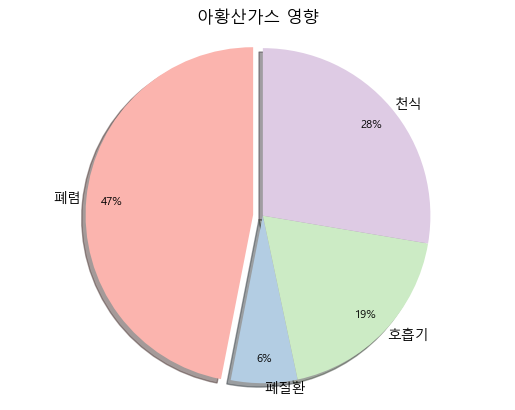

In [11]:
import seaborn as sns

colors = sns.color_palette("Pastel1")

# 파이차트 그리기
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(impact_percentages[1:], labels=impact_percentages.index[1:], autopct='%1.0f%%', startangle=90, textprops={'fontsize': 10}, radius=1.2, pctdistance=0.85, labeldistance=1.03, colors=colors, explode=[0.07,0,0,0],shadow=True)

# 텍스트 자동 조정 및 위치 조정
for autotext in autotexts:
    autotext.set(size=8, ha='center', va='center', rotation_mode='anchor')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('아황산가스 영향')
plt.show()

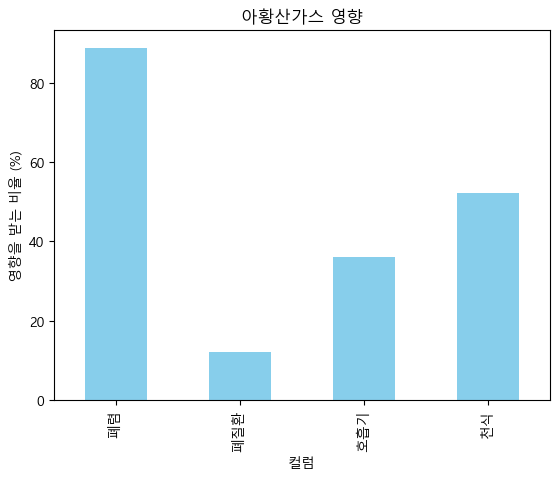

In [12]:
# 막대 그래프 그리기
fig, ax = plt.subplots()
impact_percentages[1:].plot(kind='bar', ax=ax, color='skyblue')
ax.set_ylabel('영향을 받는 비율 (%)')
ax.set_xlabel('컬럼')
ax.set_title('아황산가스 영향')

plt.show()